# Fraud Detection Model 

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import copy

## 1 Data Understanding

In [ ]:
class Data:
    """ Loading CSV File """
    data = pd.read_csv("jobs.csv")
    df = pd.DataFrame(data)
    df1 = copy.deepcopy(df)

    def head(self):
        """ Shows first 5 rows and columns of the Dataset! """
        return self.df1.head()
    
    def tail(self):
        """Shows lasr 5 rows and columns of the Dataset!"""
        return self.df1.tail()
    
    def sample(self):
        """ Randomly shows sample rows of the given dataset. """
        return self.df1.sample()
    
    def shape(self):
        """Shows Dimensions of the given dataset """
        return self.df1.shape

    def info(self):
        """ Prints a concise summary of the DataFrame."""  
        return self.df1.info() 
    
    def describe(self):
        """Descibes the Descriptive stats (mean, std, min, max, etc.) for numeric columns."""
        return self.df1.describe()
    
    def columns(self):
        """Shows lsit of List of column names."""
        return self.df1.columns
    
    def dtype(self):
        """Data types of each column.'"""
        return self.df1.dtypes
    def describe_all(self):
        """Descriptive stats for all columns (including object types)."""
        return self.df1.describe(include="all")
    

data = Data()


## 2 Data Preprocessing

In [3]:
class DataPreprocessing(Data):
    def isnull(self):
        """Detect and shows the sum of missing values of all columns."""
        return self.df1.isnull().sum()
    
    def dropna(self):
        """Dropping description as it is not important for us to fill with anything."""
        self.df1 = self.df1.dropna(subset=['description'])
    
    def fillna(self):
        """Fill missing values with specified values: Mean, Mode, or placeholder."""
        
        def avg_salary(s):
            if isinstance(s, str) and '-' in s:
                try:
                    low, high = s.split('-')
                    return (float(low.strip()) + float(high.strip())) / 2
                except:
                    return None
            return None
        
        self.df1['company_profile'].fillna('Not Provided', inplace=True)
        self.df1['requirements'].fillna('Not Provided', inplace=True)
        self.df1['benefits'].fillna('Not Provided', inplace=True)
        self.df1['salary_avg'] = self.df1['salary_range'].apply(avg_salary)
        self.df1['salary_avg'].fillna(self.df1['salary_avg'].median(), inplace=True)
        self.df1.drop(columns=['salary_range'], inplace=True)
        self.df1['location'].fillna(self.df1['location'].mode()[0], inplace=True)
        self.df1['department'].fillna(self.df1['department'].mode()[0], inplace=True)
        self.df1['employment_type'].fillna(self.df1['employment_type'].mode()[0], inplace=True)
        self.df1['required_experience'].fillna(self.df1['required_experience'].mode()[0], inplace=True)
        self.df1['required_education'].fillna(self.df1['required_education'].mode()[0], inplace=True)
        self.df1['industry'].fillna(self.df1['industry'].mode()[0], inplace=True)
        self.df1['function'].fillna(self.df1['function'].mode()[0], inplace=True)

    def isnull_sum(self):
        return self.df1.isnull().sum().sum()
    
    def feature_extraction(self):
            self.df1['desc_length'] = self.df1['description'].apply(lambda x: len(str(x)))
            self.df1['req_length'] = self.df1['requirements'].apply(lambda x: len(str(x)))
            self.df1['benefits_length'] = self.df1['benefits'].apply(lambda x: len(str(x)))
            self.df1['title_length'] = self.df1['title'].apply(lambda x: len(str(x)))
            self.df1['profile_length'] = self.df1['company_profile'].apply(lambda x: len(str(x)))
            self.df1['desc_dollar_count'] = self.df1['description'].str.count('\$')
            self.df1['desc_exclaim_count'] = self.df1['description'].str.count('!')
            scam_words = ['money', 'investment', 'fast cash', 'work from home', 'no experience', 'quick earn']
            self.df1['has_scam_words'] = self.df1['description'].apply(
                lambda x: int(any(word in x.lower() for word in scam_words)))

    
    def save_cleaned_csv(self):
        return self.df1.to_csv("phase1cleaned.csv", index="False")


<>:45: SyntaxWarning: invalid escape sequence '\$'
<>:45: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Hamza Akmal\AppData\Local\Temp\ipykernel_26248\308164695.py:45: SyntaxWarning: invalid escape sequence '\$'
  self.df1['desc_dollar_count'] = self.df1['description'].str.count('\$')


In [4]:
Pre = DataPreprocessing()
Pre.isnull()
Pre.dropna()
Pre.fillna()
Pre.isnull_sum()
Pre.feature_extraction()
Pre.save_cleaned_csv()

C:\Users\Hamza Akmal\AppData\Local\Temp\ipykernel_26248\308164695.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df1['company_profile'].fillna('Not Provided', inplace=True)
C:\Users\Hamza Akmal\AppData\Local\Temp\ipykernel_26248\308164695.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df1['company_profile'].fillna('Not Pr

## Graph

In [5]:

class Graph(DataPreprocessing):
    
    def plot_fraudulent_distribution(self):
        '''Plots the count of fraudulent vs non-fraudulent jobs'''
        self.df1['fraudulent'].value_counts().plot(kind='bar', title='Fraudulent Job Distribution')
        plt.xlabel('Fraudulent')
        plt.ylabel('Count')
        plt.show()

    def plot_employment_type(self):
        '''Plots the distribution of employment types'''
        self.df1['employment_type'].value_counts().plot(kind='bar', title='Employment Type Distribution')
        plt.xlabel('Employment Type')
        plt.ylabel('Count')
        plt.show()

    def plot_required_experience(self):
        '''Plots the distribution of required experience'''
        self.df1['required_experience'].value_counts().plot(kind='bar', title='Experience Required')
        plt.xlabel('Experience Level')
        plt.ylabel('Count')
        plt.show()

    def plot_required_education(self):
        '''Plots the distribution of required education'''
        self.df1['required_education'].value_counts().plot(kind='bar', title='Required Education')
        plt.xlabel('Education')
        plt.ylabel('Count')
        plt.show()

    def plot_telecommuting(self):
        '''Plots the count of telecommuting jobs'''
        self.df1['telecommuting'].value_counts().plot(kind='bar', title='Remote Jobs Distribution')
        plt.xlabel('Remote (0 = No, 1 = Yes)')
        plt.ylabel('Count')
        plt.show()

    def plot_has_company_logo(self):
        '''Plots the count of jobs with company logo'''
        self.df1['has_company_logo'].value_counts().plot(kind='bar', title='Company Logo Presence')
        plt.xlabel('Has Company Logo')
        plt.ylabel('Count')
        plt.show()

    def plot_has_questions(self):
        '''Plots the count of jobs using screening questions'''
        self.df1['has_questions'].value_counts().plot(kind='bar', title='Has Screening Questions')
        plt.xlabel('Has Questions')
        plt.ylabel('Count')
        plt.show()

    def plot_industry(self):
        '''Plots the top 10 industries''' 
        self.df1['industry'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Industries')
        plt.xlabel('Industry')
        plt.ylabel('Count')
        plt.show()

    def plot_function(self):
        '''Plots the top 10 job functions''' 
        self.df1['function'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Job Functions')
        plt.xlabel('Function')
        plt.ylabel('Count')
        plt.show()

    def plot_location(self):
        '''Plots the top 10 job locations''' 
        self.df1['location'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Locations')
        plt.xlabel('Location')
        plt.ylabel('Count')
        plt.show()





In [6]:
class UnivariateAnalysis(Graph):
    def run_all_univariate(self):
        '''Runs all univariate graphs from parent Graph class'''
        self.plot_fraudulent_distribution()
        self.plot_employment_type()
        self.plot_required_experience()
        self.plot_required_education()
        self.plot_telecommuting()
        self.plot_has_company_logo()
        self.plot_has_questions()
        self.plot_industry()
        self.plot_function()
        self.plot_location()

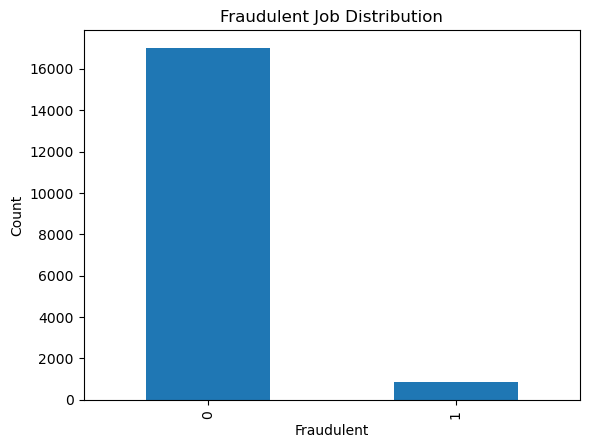

None


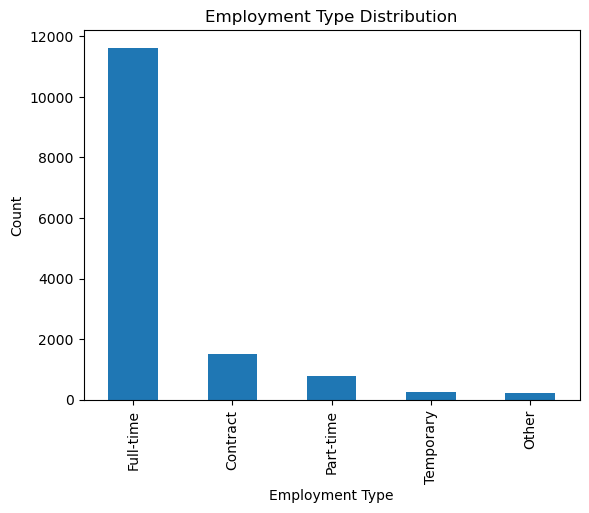

None


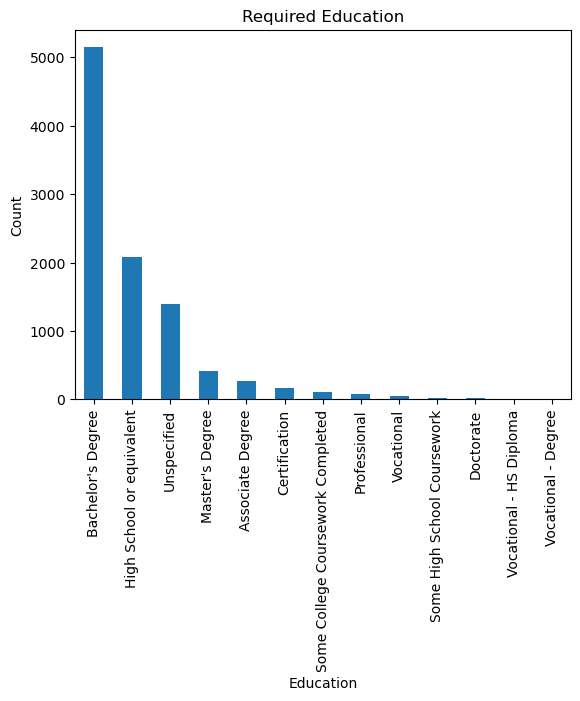

None


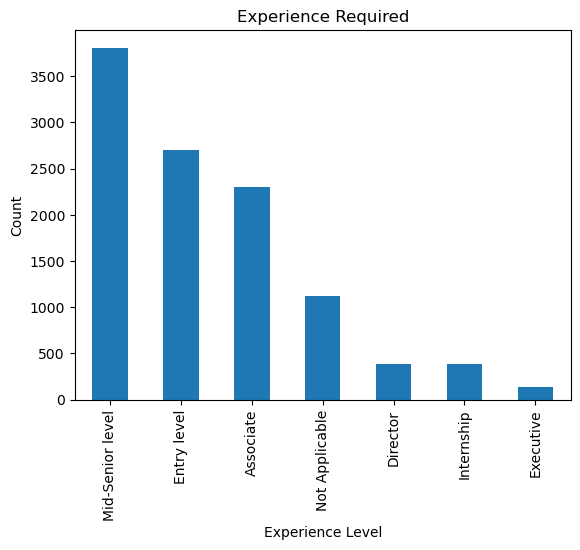

None


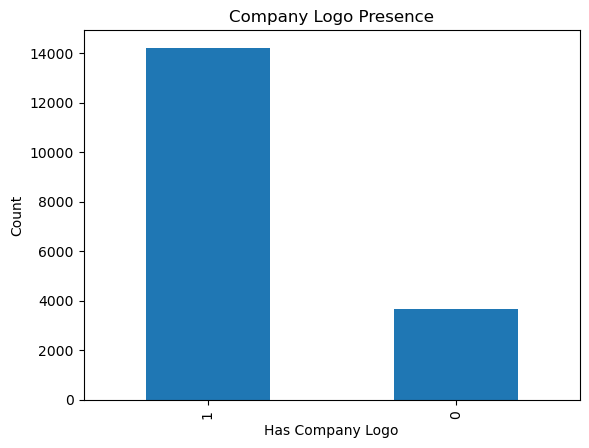

None


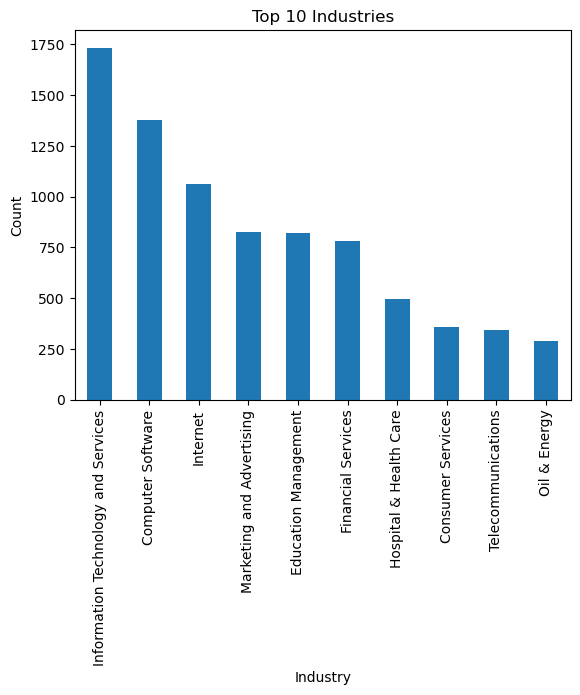

None


In [7]:
Univariate = UnivariateAnalysis()
print(Univariate.plot_fraudulent_distribution())
print(Univariate.plot_employment_type())
print(Univariate.plot_required_education())
print(Univariate.plot_required_experience())
print(Univariate.plot_has_company_logo())
print(Univariate.plot_industry())

In [8]:
class BivariateAnalysis(Graph):
    def __init__(self):
        super().__init__()
        """Class for bivariate analysis graphs."""

    # def salary_vs_department(self):
    #     """Plot average salary by department as a bar chart."""
    #     avg_salary_dept = self.df1.groupby('department')['salary_avg'].mean().sort_values(ascending=False)
    #     avg_salary_dept.plot(kind='bar', figsize=(10,6), title='Average Salary by Department')

    def salary_vs_location(self):
        """Plot average salary by location as a bar chart."""
        avg_salary_loc = self.df1.groupby('location')['salary_avg'].mean().sort_values(ascending=False).head(20)
        avg_salary_loc.plot(kind='bar', figsize=(12,6), title='Top 20 Locations by Average Salary')

    def employment_vs_fraud(self):
        """Plot employment type count split by fraudulent or not."""
        cross_tab = pd.crosstab(self.df1['employment_type'], self.df1['fraudulent'])
        cross_tab.plot(kind='bar', stacked=True, figsize=(10,6), title='Employment Type vs Fraudulent')

    def experience_vs_salary(self):
        """Plot average salary by required experience."""
        avg_salary_exp = self.df1.groupby('required_experience')['salary_avg'].mean().sort_values()
        avg_salary_exp.plot(kind='line', figsize=(10,6), title='Average Salary by Required Experience')

    def fraud_by_industry(self):
        """Plot number of fraudulent jobs by industry."""
        fraud_industry = self.df1[self.df1['fraudulent'] == 1]['industry'].value_counts().head(15)
        fraud_industry.plot(kind='bar', figsize=(12,6), title='Top 15 Industries by Fraudulent Job Count')


None


KeyError: 'Column not found: salary_avg'

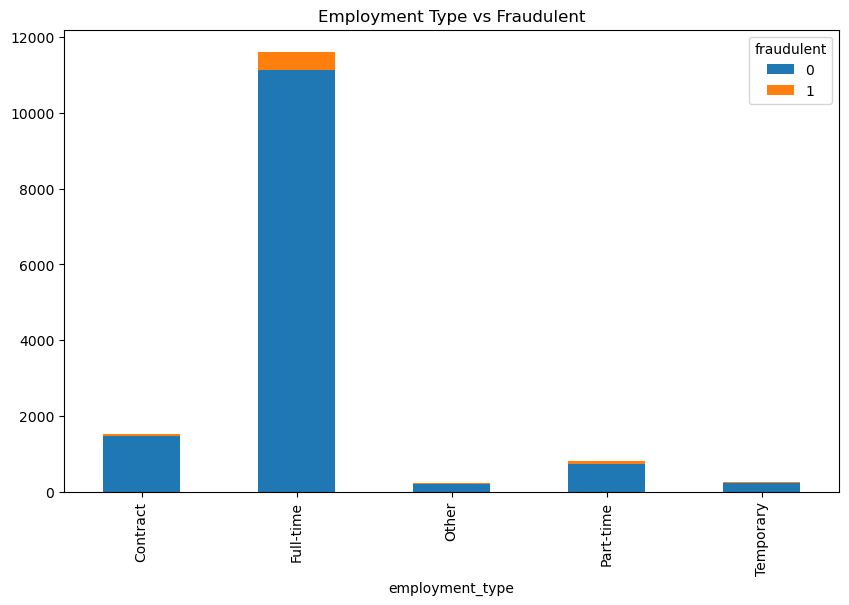

In [ ]:
Bivariate = BivariateAnalysis()
print(Bivariate.employment_vs_fraud())
print(Bivariate.salary_vs_location())
print(Bivariate.fraud_by_industry())

In [ ]:
class Model(Data):
    def encoding_data(self):
        """Combines text fields and encodes other features"""
        # Check for required columns
        required_columns = [
            'title', 'description', 'requirements', 'benefits',
            'company_profile', 'telecommuting', 'has_company_logo',
            'has_questions', 'fraudulent'
        ]
        for col in required_columns:
            if col not in self.df1.columns:
                raise ValueError(f"Missing column: {col}")

        # Create text column
        self.df1['text'] = (
            self.df1['title'].fillna('') + ' ' +
            self.df1['description'].fillna('') + ' ' +
            self.df1['requirements'].fillna('') + ' ' +
            self.df1['benefits'].fillna('') + ' ' +
            self.df1['company_profile'].fillna('')
        )

        # Vectorize text
        self.vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)
        X_text = self.vectorizer.fit_transform(self.df1['text'])

        # Other features
        X_other = self.df1[['telecommuting', 'has_company_logo', 'has_questions']].astype(float)

        # Combine
        self.X = hstack([X_text, X_other])
        self.y = self.df1['fraudulent']

        print("✅ Encoding completed")

    def split_data(self):
        """Splits the encoded data"""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
        )
        print("✅ Data split completed")
        print("X_train:", self.X_train.shape)
        print("X_test:", self.X_test.shape)
        print("y_train:", self.y_train.shape)
        print("y_test:", self.y_test.shape)

    def model_train(self, save_path="svm_fraud_model.pkl"):
        """Trains and saves the model"""
        self.model = LinearSVC(max_iter=10000, random_state=42)
        self.model.fit(self.X_train, self.y_train)

        y_pred = self.model.predict(self.X_test)

        print("✅ Model evaluation:")
        print(confusion_matrix(self.y_test, y_pred))
        print(classification_report(self.y_test, y_pred))
        print("Accuracy:", accuracy_score(self.y_test, y_pred))

        # Save model and vectorizer
        with open(save_path, "wb") as f:
            pickle.dump((self.model, self.vectorizer), f)

        print(f"✅ Model trained and saved to {save_path}")


class PickleModel:
    def __init__(self, pickle_path="svm_fraud_model.pkl"):
        """Loads model and vectorizer from pickle"""
        with open(pickle_path, "rb") as f:
            self.model, self.vectorizer = pickle.load(f)

    def predict(self, new_data_df):
        """Makes prediction from new DataFrame"""
        new_data_df['text'] = (
            new_data_df['title'].fillna('') + ' ' +
            new_data_df['description'].fillna('') + ' ' +
            new_data_df['requirements'].fillna('') + ' ' +
            new_data_df['benefits'].fillna('') + ' ' +
            new_data_df['company_profile'].fillna('')
        )

        X_text = self.vectorizer.transform(new_data_df['text'])
        X_other = new_data_df[['telecommuting', 'has_company_logo', 'has_questions']].astype(float)
        X_new = hstack([X_text, X_other])

        return self.model.predict(X_new)


In [ ]:
model = Model()
model.encoding_data()
model.split_data()
model.model_train() 

✅ Encoding completed
✅ Data split completed
X_train: (14304, 50003)
X_test: (3576, 50003)
y_train: (14304,)
y_test: (3576,)


c:\Users\HamzaAkmal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


✅ Model evaluation:
[[3402    1]
 [  38  135]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.99      0.78      0.87       173

    accuracy                           0.99      3576
   macro avg       0.99      0.89      0.93      3576
weighted avg       0.99      0.99      0.99      3576

Accuracy: 0.9890939597315436
✅ Model trained and saved to svm_fraud_model.pkl
